# Calculer la corrélation entre nombre d'actes et genre

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# On lit le fichier CSV des genres et on affiche le dataframe pour voir les associations entre les descriptions et les id
df_genre = pd.read_csv("/Users/chloe/Downloads/CSV_bdd/PlayGenre-2024-06-03.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_genre

,id,description
0,13,Parodie
1,12,Ballet pantomime
2,11,Opéra-comique
3,10,Feux d'artifice
4,9,Tragédie
5,8,Tragi-comédie
6,7,Comédie à l'impromptu
7,6,Comédie
8,5,Divertissement
9,4,Ballet


In [3]:
# On lit le fichier CSV des soirées et on affiche le dataframe 
df_soirée = pd.read_csv("/Users/chloe/Downloads/CSV_bdd/Event-2024-05-10.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_soirée

,id,note,location,date
0,28188,NaN,3,1761-11-04
1,28187,NaN,3,1756-12-07
2,28186,NaN,3,1736-10-27
3,28185,NaN,3,1736-10-20
4,28184,NaN,3,1736-10-13
...,...,...,...,...
28039,5,NaN,1,1723-01-05
28040,4,NaN,1,1723-01-04
28041,3,NaN,1,1723-01-03
28042,2,NaN,1,1723-01-02


In [4]:
# On lit le fichier CSV des représentations et on affiche le dataframe
df_representation = pd.read_csv("/Users/chloe/Downloads/CSV_bdd/Representation-2024-05-10.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_representation

,id,note,play,event,representation_order
0,16036,NaN,572,17202,2.0
1,16035,NaN,6,17202,1.0
2,16034,NaN,994,17201,3.0
3,16033,NaN,974,17201,2.0
4,16032,NaN,993,17201,1.0
...,...,...,...,...,...
15839,7,NaN,40,10010,NaN
15840,6,NaN,31,10008,NaN
15841,5,NaN,39,10006,NaN
15842,4,NaN,14,10003,NaN


In [5]:
df_joined = df_soirée.merge(df_representation, left_on= 'id', right_on='event')
df_joined

,id_x,note_x,location,date,id_y,note_y,play,event,representation_order
0,28188,NaN,3,1761-11-04,14964,NaN,677,28188,6.0
1,28188,NaN,3,1761-11-04,14963,NaN,945,28188,5.0
2,28187,NaN,3,1756-12-07,11194,Le même jour on devait représenter à Versaille...,640,28187,4.0
3,28186,NaN,3,1736-10-27,10063,NaN,405,28186,2.0
4,28186,NaN,3,1736-10-27,10059,NaN,18,28186,1.0
...,...,...,...,...,...,...,...,...,...
15839,2,NaN,1,1723-01-02,1631,NaN,3,2,NaN
15840,2,NaN,1,1723-01-02,1630,NaN,2,2,NaN
15841,1,NaN,1,1723-01-01,1629,NaN,1,1,7.0
15842,1,NaN,1,1723-01-01,1628,NaN,167,1,NaN


In [6]:
df_joined = df_joined.rename(columns= {'id_x' : 'id_soirée', 'id_y' : 'id_representation'})
df_joined

,id_soirée,note_x,location,date,id_representation,note_y,play,event,representation_order
0,28188,NaN,3,1761-11-04,14964,NaN,677,28188,6.0
1,28188,NaN,3,1761-11-04,14963,NaN,945,28188,5.0
2,28187,NaN,3,1756-12-07,11194,Le même jour on devait représenter à Versaille...,640,28187,4.0
3,28186,NaN,3,1736-10-27,10063,NaN,405,28186,2.0
4,28186,NaN,3,1736-10-27,10059,NaN,18,28186,1.0
...,...,...,...,...,...,...,...,...,...
15839,2,NaN,1,1723-01-02,1631,NaN,3,2,NaN
15840,2,NaN,1,1723-01-02,1630,NaN,2,2,NaN
15841,1,NaN,1,1723-01-01,1629,NaN,1,1,7.0
15842,1,NaN,1,1723-01-01,1628,NaN,167,1,NaN


In [7]:
# On lit le fichier CSV des pièces et on affiche le dataframe
df_plays = pd.read_csv("/Users/chloe/Downloads/CSV_bdd/Play-2024-05-10.csv", delimiter=',', engine="python", encoding='utf-8', header=0)
df_plays

,id,note,original_title,number_of_acts,entertainment,has_prologue,genre,type,language,edition,source
0,1033,NaN,1036,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1032,NaN,1035,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1031,NaN,1034,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1030,NaN,1033,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1029,NaN,1032,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1021,5,NaN,5,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1022,4,Commedia con la quale Marivaux incammina il re...,4,1,NaN,0.0,6.0,1.0,2.0,"Paris, Veuve Guillaume, 1720. Confluita in Nou...",NaN
1023,3,"PARFAICT 1767, vol. VII, p. 385: «Un acte en p...",3,1,1.0,0.0,6.0,3.0,2.0,"In GHERARDI 1700, vol. V, pp. 513-549. In GHER...",NaN
1024,2,"GUEULLETTE 1938, p. 87: «Cette pièce est de Le...",2,3,NaN,0.0,7.0,NaN,1.0,"Argument in Nou. Th. It., 1733, vol. I, pp. 48...",NaN


In [8]:
df_joined2 = df_joined.merge(df_plays, left_on= 'id_representation', right_on='original_title')
df_joined2 

,id_soirée,note_x,location,date,id_representation,note_y,play,event,representation_order,id,note,original_title,number_of_acts,entertainment,has_prologue,genre,type,language,edition,source
0,12421,NaN,3,1719-01-26,561,NaN,11,12421,NaN,561,Balletto pantomima eseguito dopo Le Prince de ...,561,1,NaN,0.0,12.0,NaN,NaN,NaN,NaN
1,12123,NaN,1,1722-03-10,1036,NaN,18,12123,NaN,1033,NaN,1036,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12122,NaN,1,1722-03-09,1035,NaN,164,12122,NaN,1032,NaN,1035,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12122,NaN,1,1722-03-09,1034,NaN,14,12122,NaN,1031,NaN,1034,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12121,NaN,1,1722-03-08,1033,NaN,18,12121,NaN,1030,NaN,1033,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,5189,NaN,1,1737-03-16,103,NaN,405,5189,NaN,103,"Primo canovaccio francese, ma anonimo, recitat...",103,3,NaN,0.0,7.0,NaN,1.0,NaN,NaN
992,5189,NaN,1,1737-03-16,102,NaN,412,5189,NaN,102,"GUEULLETTE 1938, p. 84: «Cette pièce, qui est ...",102,3,NaN,0.0,7.0,NaN,1.0,NaN,NaN
993,5188,NaN,1,1737-03-15,100,NaN,351,5188,NaN,100,"Pantalon débauché corrisponde all'Ubriaco, il ...",100,5,NaN,0.0,7.0,NaN,1.0,"Argument in Nou. Th. It., 1733, vol. I, pp. 26...",NaN
994,5187,NaN,1,1737-03-14,97,NaN,319,5187,NaN,97,"Indicazione incerta riportata da BRENNER 1947,...",97,1,NaN,0.0,11.0,3.0,3.0,NaN,"BnF, Ms. f. fr. 9335."


In [9]:
# On renomme le 3e id en id_piece
df_joined2 = df_joined2.rename(columns= {'id' : 'id_piece'})
df_joined2

,id_soirée,note_x,location,date,id_representation,note_y,play,event,representation_order,id_piece,note,original_title,number_of_acts,entertainment,has_prologue,genre,type,language,edition,source
0,12421,NaN,3,1719-01-26,561,NaN,11,12421,NaN,561,Balletto pantomima eseguito dopo Le Prince de ...,561,1,NaN,0.0,12.0,NaN,NaN,NaN,NaN
1,12123,NaN,1,1722-03-10,1036,NaN,18,12123,NaN,1033,NaN,1036,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12122,NaN,1,1722-03-09,1035,NaN,164,12122,NaN,1032,NaN,1035,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12122,NaN,1,1722-03-09,1034,NaN,14,12122,NaN,1031,NaN,1034,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12121,NaN,1,1722-03-08,1033,NaN,18,12121,NaN,1030,NaN,1033,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,5189,NaN,1,1737-03-16,103,NaN,405,5189,NaN,103,"Primo canovaccio francese, ma anonimo, recitat...",103,3,NaN,0.0,7.0,NaN,1.0,NaN,NaN
992,5189,NaN,1,1737-03-16,102,NaN,412,5189,NaN,102,"GUEULLETTE 1938, p. 84: «Cette pièce, qui est ...",102,3,NaN,0.0,7.0,NaN,1.0,NaN,NaN
993,5188,NaN,1,1737-03-15,100,NaN,351,5188,NaN,100,"Pantalon débauché corrisponde all'Ubriaco, il ...",100,5,NaN,0.0,7.0,NaN,1.0,"Argument in Nou. Th. It., 1733, vol. I, pp. 26...",NaN
994,5187,NaN,1,1737-03-14,97,NaN,319,5187,NaN,97,"Indicazione incerta riportata da BRENNER 1947,...",97,1,NaN,0.0,11.0,3.0,3.0,NaN,"BnF, Ms. f. fr. 9335."


# A la fin, il faut un tableau avec le nombre d'actes et le genre

In [10]:
# On supprime les colonnes inutiles
df_joined_final = df_joined2.drop(columns=['id_soirée', 'date', 'play', 'event', 'representation_order', 'id_piece', 'original_title', 'id_representation', 'note_x', 'note_y', 'note', 'location', 'entertainment', 'has_prologue', 'type', 'language', 'edition', 'source'])
df_joined_final

,number_of_acts,genre
0,1,12.0
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
991,3,7.0
992,3,7.0
993,5,7.0
994,1,11.0


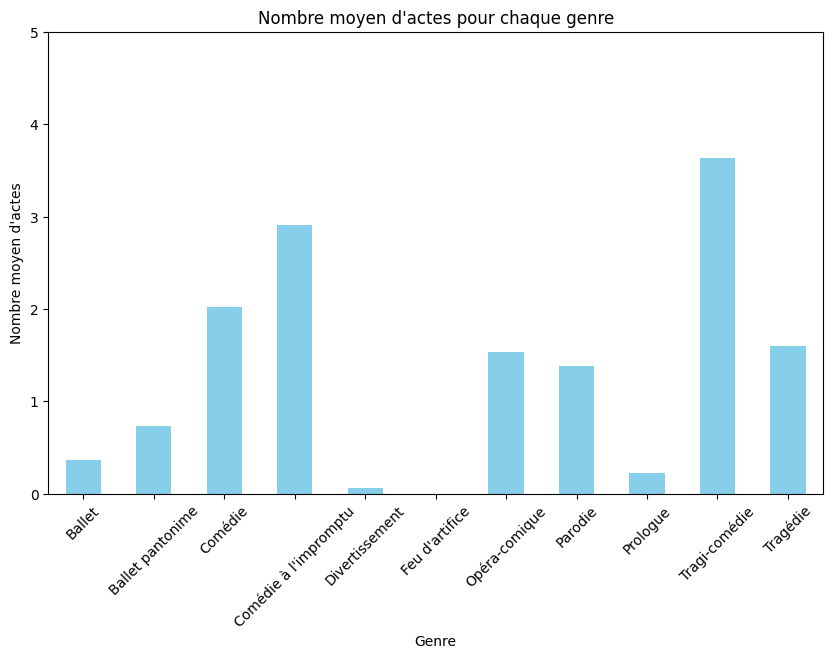

In [11]:
# Charger le dataframe 
df_joined2

# Remplacer les valeurs NaN par 0 
df_joined2['genre'] = df_joined2['genre'].fillna(0)

# Dictionnaire de mappage des genres 
genre_mapping = {
    3.0: 'Prologue',
    4.0: 'Ballet',
    5.0: 'Divertissement',
    6.0: 'Comédie',
    7.0: 'Comédie à l\'impromptu',
    8.0: 'Tragi-comédie',
    9.0: 'Tragédie',
    10.0: 'Feu d\'artifice',
    11.0: 'Opéra-comique',
    12.0: 'Ballet pantonime',
    13.0: 'Parodie'
}

# Convertir les valeurs numériques en descriptions de genre
df_joined2['genre'] = df_joined2['genre'].map(genre_mapping)

# Vérifier que la colonne 'number_of_acts' existe et ne contient pas de valeurs manquantes
if 'number_of_acts' in df_joined2.columns:
    df_joined2['number_of_acts'] = df_joined2['number_of_acts'].fillna(0)
else:
    raise ValueError("La colonne 'number_of_acts' n'existe pas dans le DataFrame.")

# Calculer la moyenne des actes pour chaque genre
average_acts_per_genre = df_joined2.groupby('genre')['number_of_acts'].mean()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
average_acts_per_genre.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Nombre moyen d\'actes')
plt.title('Nombre moyen d\'actes pour chaque genre')
plt.ylim(0, 5)  # Définir l'axe y de 0 à 5
plt.yticks(range(6))  # Ajuster le nombre de graduations de l'axe y
plt.xticks(rotation=45)
plt.show()
